# Python для сбора и анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Практикум 3: методы на строках, работа с текстом

### Задача 1

Напишите программу, которая запрашивает у пользователя с клавиатуры некоторый текст, и выводит на экран этот текст, только заглавными буквами и с восклицательным знаком на конце.

**Пример работы программы**

Ввод:

    exam is coming

Вывод:

    EXAM IS COMING!

In [1]:
text = input()
print(text.upper() + "!")

крик души
КРИК ДУШИ!


### Задача 2

Напишите программу, которая принимает на вход список слов `words` и создаёт на его основе новый список `words_clean`, в котором все слова написаны в нижнем регистре. 

In [2]:
words = ["Speak ", "to", "me ", "of", "Florence ",
         "And ", "of", "the", "Renaissance"]

In [3]:
# через цикл
words_clean = []
for word in words:
    words_clean.append(word.lower())

In [4]:
# через списковое включение
words_clean = [word.lower() for word in words] 
words_clean

['speak ', 'to', 'me ', 'of', 'florence ', 'and ', 'of', 'the', 'renaissance']

In [5]:
# то же, но уберем и лишние пробелы тоже
# методы можно «наслаивать» друг на друга
words_clean = [word.lower().strip() for word in words] 
words_clean

['speak', 'to', 'me', 'of', 'florence', 'and', 'of', 'the', 'renaissance']

### Задача 3

Напишите программу, которая приводит текст, сохранённый в переменной `text`, к нормальному виду. Нормальный вид текста: текст состоит только из слов в начальной форме, записанных маленькими буквами через пробел, нет никаких посторонних символов. 

Алгоритм работы: 

1. Привести все буквы к нижнему регистру.
2. Заменить все знаки препинания на пробелы. 
3. Разбить текст на слова и получить список слов.
4. Избавиться от лишних пробелов в словах внутри полученного списка.
5. Привести каждое слово в списке к начальной форме.
6. Склеить все слова в начальной форме в одну строку с текстом.

**Полезный код 1.** Знаки препинания можно извлечь из строки `punctuation`, которая хранится в модуле `string`. Однако там не все знаки препинания, например, нет русских кавычек-ёлочек и длинного тире. Их можно добавить самостоятельно!

In [6]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**Полезный код 2.** Привести слова к начальной форме без специальных библиотек не получится. Можно установить библиотеку `pymorphy2`, в неё встроен морфологический анализатор – программа, которая позволяет выполнять морфологический разбор слова.

Установка библиотеки:

In [ ]:
!pip install pymorphy2

In [7]:
from pymorphy2 import MorphAnalyzer

# создаем анализатор
morph = MorphAnalyzer()

# делаем разбор и забираем начальную форму
print(morph.parse('политологами')[0].normal_form)

политолог


In [8]:
# почему извлекаем элемент с индексом 0?
# всегда возвращается список всех возможных разборов,
# а мы забираем самый вероятный

# многозначный пример

# NOUN,inan,neut sing,nomn: существительное, неодушевленное, 
# средний род, единственное число, именительный падеж (номинатив)

# NOUN,inan,neut sing,accs: существительное, неодушевленное, 
# средний род, единственное число, винительный падеж (аккузатив)

# VERB,perf,intr neut,sing,past,indc: глагол прошедшего времени, 
# непереходный, средний род, единственное число, 
# изъявительное наклонение (индикатив)

morph.parse('стекло')

[Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,nomn'), normal_form='стекло', score=0.690476, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 0),)),
 Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='стекло', score=0.285714, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 3),)),
 Parse(word='стекло', tag=OpencorporaTag('VERB,perf,intr neut,sing,past,indc'), normal_form='стечь', score=0.023809, methods_stack=((DictionaryAnalyzer(), 'стекло', 1015, 3),))]

In [9]:
# из Википедии

text = """
Как поэт Высоцкий реализовал себя, прежде всего, в жанре 
авторской песни. Первые из написанных им произведений относятся 
к началу 1960-х годов. Вначале они исполнялись в кругу друзей, 
позже получили широкую известность благодаря распространявшимся 
по стране магнитофонным записям. Поэзия Высоцкого отличалась 
многообразием тем (уличные, лагерные, военные, сатирические, 
бытовые, сказочные, «спортивные» песни), остротой смыслового 
подтекста и акцентированной социально-нравственной позицией 
автора. В его произведениях, рассказывающих о внутреннем 
выборе людей, поставленных в экстремальные обстоятельства, 
прослеживались экзистенциальные мотивы. Творческая эволюция 
Высоцкого прошла в несколько этапов. В его раннем творчестве 
преобладали уличные и дворовые песни. С середины 1960-х годов 
тематика произведений начала расширяться, а песенные циклы — 
складываться в новую «энциклопедию русской жизни». 
В 1970-х годах значительную часть творчества Высоцкого 
составляли песни и стихотворения исповедально-философского характера, 
поэт часто обращался к вечным вопросам бытия.
"""

In [10]:
# обновляем набор символов – добавляем длинное тире

punctuation = punctuation + "«»—"
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~«»—


In [11]:
text = text.lower()

# заменяем каждый символ из punctuation на пробел
for p in punctuation:
    text = text.replace(p, " ")

# разбиваем на слова    
words = text.split() 

# забираем начальную форму для каждого слова
lemmas = []
for word in words:
    r = morph.parse(word)[0].normal_form
    lemmas.append(r)

# склеиваем начальные формы в одну строку    
final = " ".join(lemmas)
print(final)

как поэт высоцкий реализовать себя прежде весь в жанр авторский песня первый из написать они произведение относиться к начало 1960 х год вначале они исполняться в круг друг поздний получить широкий известность благодаря распространяться по страна магнитофонный запись поэзия высоцкий отличаться многообразие тем уличный лагерный военный сатирический бытовой сказочный спортивный песня острота смысловой подтекст и акцентировать социально нравственный позиция автор в он произведение рассказывать о внутренний выбор человек поставить в экстремальный обстоятельство прослеживаться экзистенциальный мотив творческий эволюция высоцкий пройти в несколько этап в он ранний творчество преобладать уличный и дворовый песня с середина 1960 х год тематика произведение начало расширяться а песенный цикл складываться в новый энциклопедия русский жизнь в 1970 х год значительный часть творчество высоцкий составлять песня и стихотворение исповедальный философский характер поэт часто обращаться к вечный вопрос 

**Бонус.** Построим облако слов для этого текста. Установим библиотеку `wordcloud`:

In [ ]:
!pip install wordcloud

Импортируем оттуда функцию `WordCloud()` (на самом деле, класс `WordCloud`, который создает объект типа *WordCloud* с определенными методами):

In [12]:
from wordcloud import WordCloud

Импортируем модуль для отрисовки графиков (уже установлен вместе с Anaconda):

In [13]:
from matplotlib import pyplot as plt

Генерируем облако слов через метод `.generate()` и отрисовываем его:

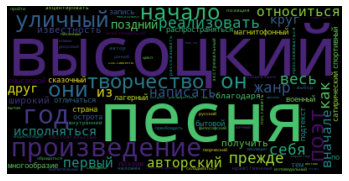

In [14]:
# plt.axis(): выключаем оси, нам не нужны засечки по осям Ox, Oy

wordcloud = WordCloud().generate(final)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Чтобы убрать стоп-слова (частые слова вроде предлогов, союзов и местоимений, которые не несут большой смысловой нагрузки), загрузим их из текстового файла со словами на Github.

Файл `stopwords-ru.txt` можно скачать по [ссылке](https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt), кликнув правой клавишей в браузере (Chrome, Firefox) и выбрав *Сохранить как*.

In [15]:
# открываем файл и считываем строки

file = open("stopwords-ru.txt", "r", encoding = "utf-8")
lines = file.readlines()

In [16]:
# удаляем лишние \n в конце строк
# смотрим на первые 30 слов

words = [line.strip() for line in lines]
print(words[0:30])

['c', 'а', 'алло', 'без', 'белый', 'близко', 'более', 'больше', 'большой', 'будем', 'будет', 'будете', 'будешь', 'будто', 'буду', 'будут', 'будь', 'бы', 'бывает', 'бывь', 'был', 'была', 'были', 'было', 'быть', 'в', 'важная', 'важное', 'важные', 'важный']


Осталось учесть этот список при генерации облака слов – аргумент `stopwords`:

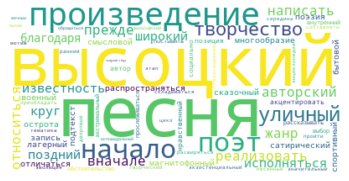

In [17]:
# заодно сделаем цвет фона белым

wordcloud = WordCloud(stopwords = words, 
                     background_color="white").generate(final)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Добавим маску, чтобы сделать облако слов похожим на гитару. Импортируем функцию `Image()` для обработки изображений и библиотеку `numpy` для превращения изображения в числовой массив:

In [18]:
from PIL import Image
import numpy as np

Создаём массив на основе изображения `guitar.jpeg` ([ссылка](https://www.dropbox.com/s/upcedsfo0nfy42y/guitar.jpeg?dl=0) на картинку, источник [Freepik](https://www.freepik.com/free-vector/silhouettes-set-acoustic-guitars_1127701.htm#query=guitar%20silhouette&position=0&from_view=search&track=ais)):

In [19]:
my_mask = np.array(Image.open("guitar.jpeg"))

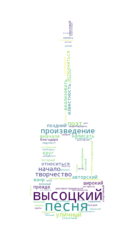

In [20]:
# добавляем аргумент mask

wordcloud = WordCloud(stopwords = words, 
                     background_color="white",
                     mask = my_mask).generate(final)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Построим график побольше и с разрешением повыше. Визуализацию более подробно мы будем обсуждать позже, для понимания кода ниже достаточно осознать, что график `matplotlib` состоит из двух частей:

* «рамка» для картинки (обычно сохраняется в переменную `fig`);
* поле с осями, внутри которого строится график (обычно сохраняется как `ax`).

Так, мы можем воспользоваться функцией `subplots()` и сообщить Python, что мы хотим получить картинку размера 8 на 4.5 дюйма и разрешением 300 точек на дюйм (`dpi` от *dots per inch*):

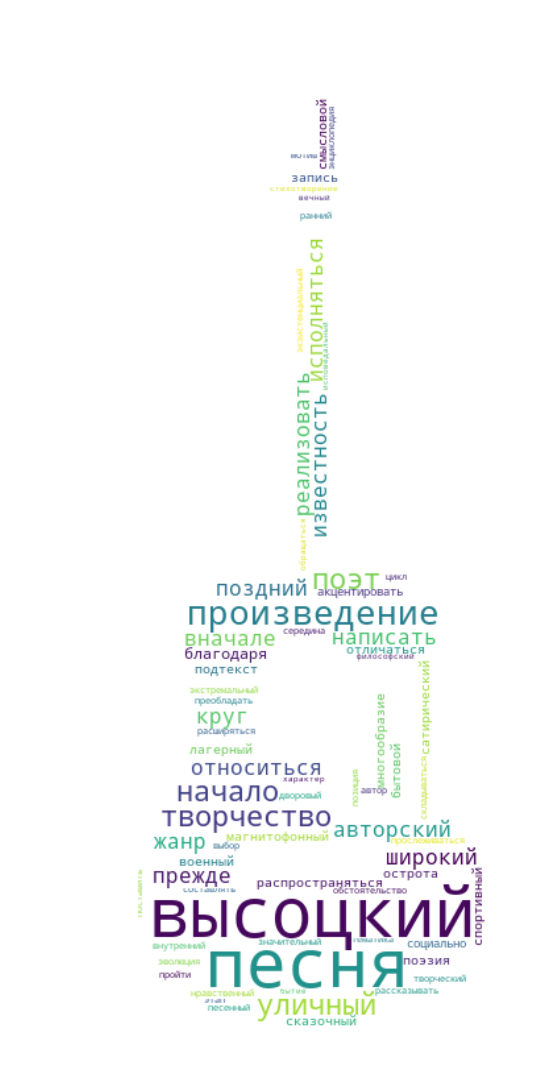

In [22]:
# множественное присваивание, subplots() возвращает сразу 2 элемента

fig, ax = plt.subplots(figsize = (8, 4.5), dpi = 300) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Осталось сохранить картинку – сохранится в рабочую папку рядом с текущим ipynb-файлом:

In [ ]:
fig.savefig("my_cloud.png")

Ура! Если разобраться, построить облако слов не очень сложно :) Только текст нужен, конечно, побольше. В качестве изображения для маски имеет смысл брать векторное изображение (не растровое, то есть не из пикселей как фото) с узнаваемым объектом и минимальным количеством мелких деталей. Изображения можно находить на ресурсах типа [Freepik.com](https://www.freepik.com/) (есть бесплатные варианты для некоммерческого использования, например, для всяких презентаций), выставив фильтр *vector* или отрисовывать самостоятельно (Illustrator, Figma, Pinta, etc).